In [2]:
!pip install kaggle --upgrade

import os
os.environ['KAGGLE_USERNAME'] = 'hardm00n'
os.environ['KAGGLE_KEY'] = '705411ac0f42b6a6e137b07cfb0b188e'

!kaggle datasets download -d shivamb/netflix-shows
!unzip '*.zip'

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 25.1MB/s]
Archive:  netflix-shows.zip
  inflating: netflix_titles.csv      


In [3]:
!ls

netflix-shows.zip  netflix_titles.csv  sample_data


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/content/netflix_titles.csv')
print(data.shape)
data.head()

(8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
data['country'] = data['country'].fillna(data['country'].mode()[0])  # 최빈값으로 결측치 대체
data['director'].replace(np.nan, 'No Data',inplace=True)  # 감독 결측치는 'No Data'로 일단은 대체!
data.dropna(inplace=True) # 기타 결측치 제거
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [8]:
import datetime

data['date_added'] = pd.to_datetime(data['date_added'])
data['month'] = data['date_added'].dt.month

In [9]:
data['season'] = 0
data.loc[(data['month'] < 3) | (data['month'] == 12), 'season'] = 'Winter'
data.loc[(data['month'] >= 3) & (data['month'] < 6), 'season'] = 'Spring'
data.loc[(data['month'] >= 6) & (data['month'] < 9), 'season'] = 'Summer'
data.loc[(data['month'] >= 9) & (data['month'] < 12), 'season'] = 'Autumn'
data = data.drop(['date_added', 'cast', 'description'], axis=1)

In [10]:
data

,show_id,type,title,director,country,release_year,rating,duration,listed_in,month,season
1,s2,TV Show,Blood & Water,No Data,South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",9,Autumn
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,Autumn
4,s5,TV Show,Kota Factory,No Data,India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",9,Autumn
5,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,Autumn
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021,PG,91 min,Children & Family Movies,9,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",3,Spring
8802,s8803,Movie,Zodiac,David Fincher,United States,2007,R,158 min,"Cult Movies, Dramas, Thrillers",11,Autumn
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min,"Comedies, Horror Movies",11,Autumn
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min,"Children & Family Movies, Comedies",1,Winter


In [11]:
data['season'].value_counts()

Summer    2079
Autumn    2029
Winter    1933
Spring    1924
Name: season, dtype: int64

In [12]:
print(data['listed_in'])

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
6                                Children & Family Movies
                              ...                        
8801              Dramas, International Movies, Thrillers
8802                       Cult Movies, Dramas, Thrillers
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 7965, dtype: object


### *장르값 정리해주기*
- 중복되는 장르를 하나로 통일 해 주기 (ex. Dramas & TV Daramas)
- ','를 기준으로 split 할 때 ',' 뒤에 띄어쓰기 때문에 같은장르를 다르게 인식함 -> ',' 뒤 띄어쓰기 삭제


In [13]:
data['listed_in'] = data['listed_in'].str.replace(", ",",")
data['listed_in'] = data['listed_in'].str.replace("International TV Shows,","")
data['listed_in'] = data['listed_in'].str.replace("International Movies,","")
data['listed_in'] = data['listed_in'].str.replace(",International TV Shows","")
data['listed_in'] = data['listed_in'].str.replace(",International Movies","")
data['listed_in'] = data['listed_in'].str.replace("TV Shows,","")
data['listed_in'] = data['listed_in'].str.replace("Movies,","")
data['listed_in'] = data['listed_in'].str.replace(",TV Shows","")
data['listed_in'] = data['listed_in'].str.replace(",Movies","")
data['listed_in'] = data['listed_in'].str.replace("TV ","")
print(data['listed_in'])

1                 Dramas,Mysteries
2         Crime Action & Adventure
4                Romantic Comedies
5          Dramas,Horror,Mysteries
6         Children & Family Movies
                   ...            
8801              Dramas,Thrillers
8802         Cult Dramas,Thrillers
8804        Comedies,Horror Movies
8805    Children & Family Comedies
8806       Dramas,Music & Musicals
Name: listed_in, Length: 7965, dtype: object


### *하나의 영화나 tv show 에 해당되는 장르 분할*


In [14]:
data['listed_in'] = data['listed_in'].apply(lambda g : [x for x in g.split(',')])
print(data['listed_in'])

1                [Dramas, Mysteries]
2         [Crime Action & Adventure]
4                [Romantic Comedies]
5        [Dramas, Horror, Mysteries]
6         [Children & Family Movies]
                    ...             
8801             [Dramas, Thrillers]
8802        [Cult Dramas, Thrillers]
8804       [Comedies, Horror Movies]
8805    [Children & Family Comedies]
8806      [Dramas, Music & Musicals]
Name: listed_in, Length: 7965, dtype: object


### *계절별 장르 뽑기*
- 계절별로 장르 컬럼 가져오기
- 장르 하나씩 분리하여 dataframe 에 추가
- ```value_counts``` 이용해 계졀별로 가장 많은 장르 순위 top 10 뽑기

#### 1. 봄

In [158]:
spring = data[data['season']=='Spring']
genre_spring = spring[['listed_in','season']]
genre_spring.head()

,listed_in,season
825,"[Crime Dramas, Mysteries]",Spring
826,[Stand-Up Comedy],Spring
827,[Comedies],Spring
828,[Dramas],Spring
829,[Children & Family Comedies],Spring


In [74]:
spring_data = pd.DataFrame()
for genre in genre_spring['listed_in']:
  # idx = genre_spring.index(genre_spring['listed_in']genre)
  new_data = pd.DataFrame({'listed_in' : genre,'season':['Spring']*len(genre)})
  
  spring_data = spring_data.append(new_data)
  
spring_data

,listed_in,season
0,Crime Dramas,Spring
1,Mysteries,Spring
0,Stand-Up Comedy,Spring
0,Comedies,Spring
0,Dramas,Spring
...,...,...
1,Kids' TV,Spring
0,Dramas,Spring
1,Thrillers,Spring
0,Dramas,Spring


In [17]:
top_genre_spring = spring_data['listed_in'].value_counts()
top_genre_spring.head(15)

Dramas                        697
Comedies                      458
Action & Adventure            208
Romantic Movies               140
Independent Movies            135
Documentaries                 107
Thrillers                     104
Stand-Up Comedy                81
Kids' TV                       81
Music & Musicals               77
Children & Family Comedies     64
Sci-Fi & Fantasy               57
Children & Family Movies       49
Anime Series                   43
Sports Movies                  41
Name: listed_in, dtype: int64

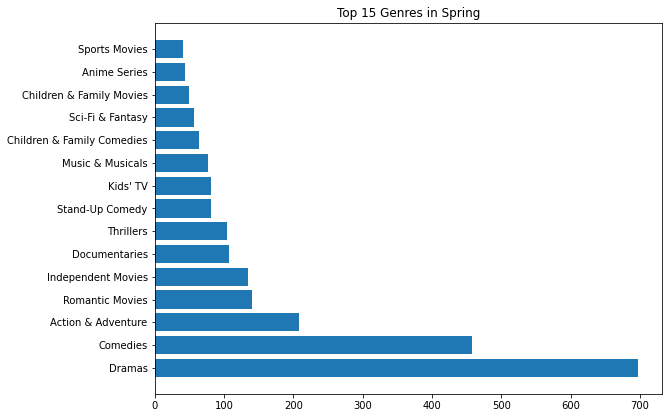

In [69]:
fig = plt.figure(figsize=(20,15))
y = np.arange(15)
plt.subplot(2,2,1)
plt.title("Top 15 Genres in Spring")
top_genre = top_genre_spring.index[:15]
top_counts = top_genre_spring[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)
plt.show()

#### 2. 여름

In [19]:
summer = data[data['season']=='Summer']
genre_summer = summer[['listed_in','season']]
genre_summer

,listed_in,season
183,"[Action & Adventure, Classic Movies]",Summer
184,[Reality TV],Summer
186,[Romantic Comedies],Summer
187,[Comedies],Summer
188,[Comedies],Summer
...,...,...
8776,[Children & Family Comedies],Summer
8783,[Kids' TV],Summer
8784,[Children & Family Movies],Summer
8785,[Kids' TV],Summer


In [20]:
summer_data = pd.DataFrame()
for genre in genre_summer['listed_in']:
  new_data = pd.DataFrame({'listed_in' : genre,'season':['Summer']*len(genre)})
  summer_data = summer_data.append(new_data)

summer_data

,listed_in,season
0,Action & Adventure,Summer
1,Classic Movies,Summer
0,Reality TV,Summer
0,Romantic Comedies,Summer
0,Comedies,Summer
...,...,...
0,Children & Family Comedies,Summer
0,Kids' TV,Summer
0,Children & Family Movies,Summer
0,Kids' TV,Summer


In [21]:
top_genre_summer = summer_data['listed_in'].value_counts()
top_genre_summer.head(10)

Dramas                721
Comedies              446
Action & Adventure    270
Independent Movies    142
Romantic Movies       138
Thrillers             124
Documentaries         113
Kids' TV               98
Stand-Up Comedy        83
Sci-Fi & Fantasy       78
Name: listed_in, dtype: int64

#### 3. 가을

In [22]:
autumn = data[data['season']=='Autumn']
genre_autumn = autumn[['listed_in','season']]
genre_autumn

,listed_in,season
1,"[Dramas, Mysteries]",Autumn
2,[Crime Action & Adventure],Autumn
4,[Romantic Comedies],Autumn
5,"[Dramas, Horror, Mysteries]",Autumn
6,[Children & Family Movies],Autumn
...,...,...
8793,[Children & Family Comedies],Autumn
8794,"[Dramas, Independent Movies]",Autumn
8797,[Kids' TV],Autumn
8802,"[Cult Dramas, Thrillers]",Autumn


In [23]:
autumn_data = pd.DataFrame()
for genre in genre_autumn['listed_in']:
  new_data = pd.DataFrame({'listed_in' : genre,'season':['Autumn']*len(genre)})
  autumn_data = autumn_data.append(new_data)

autumn_data

,listed_in,season
0,Dramas,Autumn
1,Mysteries,Autumn
0,Crime Action & Adventure,Autumn
0,Romantic Comedies,Autumn
0,Dramas,Autumn
...,...,...
0,Kids' TV,Autumn
0,Cult Dramas,Autumn
1,Thrillers,Autumn
0,Comedies,Autumn


In [24]:
top_genre_autumn = autumn_data['listed_in'].value_counts()
top_genre_autumn.head(10)

Dramas                649
Comedies              432
Action & Adventure    260
Romantic Movies       149
Independent Movies    123
Thrillers             118
Documentaries         109
Kids' TV              100
Music & Musicals       96
Stand-Up Comedy        84
Name: listed_in, dtype: int64

#### 4. 겨울

In [25]:
winter = data[data['season']=='Winter']
genre_winter = winter[['listed_in','season']]
genre_winter

,listed_in,season
1257,[Anime Series],Winter
1258,[Children & Family Comedies],Winter
1259,"[Comedies, Dramas, Independent Movies]",Winter
1260,"[Comedies, Romantic Movies]",Winter
1261,"[Dramas, Independent Movies]",Winter
...,...,...
8796,[Dramas],Winter
8798,"[Comedies, Dramas]",Winter
8799,[Dramas],Winter
8800,[Romantic Dramas],Winter


In [26]:
winter_data = pd.DataFrame()
for genre in genre_winter['listed_in']:
  new_data = pd.DataFrame({'listed_in' : genre,'season':['Winter']*len(genre)})
  winter_data = winter_data.append(new_data)

winter_data

,listed_in,season
0,Anime Series,Winter
0,Children & Family Comedies,Winter
0,Comedies,Winter
1,Dramas,Winter
2,Independent Movies,Winter
...,...,...
0,Comedies,Winter
1,Dramas,Winter
0,Dramas,Winter
0,Romantic Dramas,Winter


In [27]:
top_genre_winter = winter_data['listed_in'].value_counts()
top_genre_winter.head(10)

Dramas                641
Comedies              408
Action & Adventure    219
Independent Movies    158
Romantic Movies       128
Thrillers             105
Documentaries         101
Kids' TV               96
Stand-Up Comedy        94
Music & Musicals       68
Name: listed_in, dtype: int64

### *계절별 장르 top 10 시각화 하기*

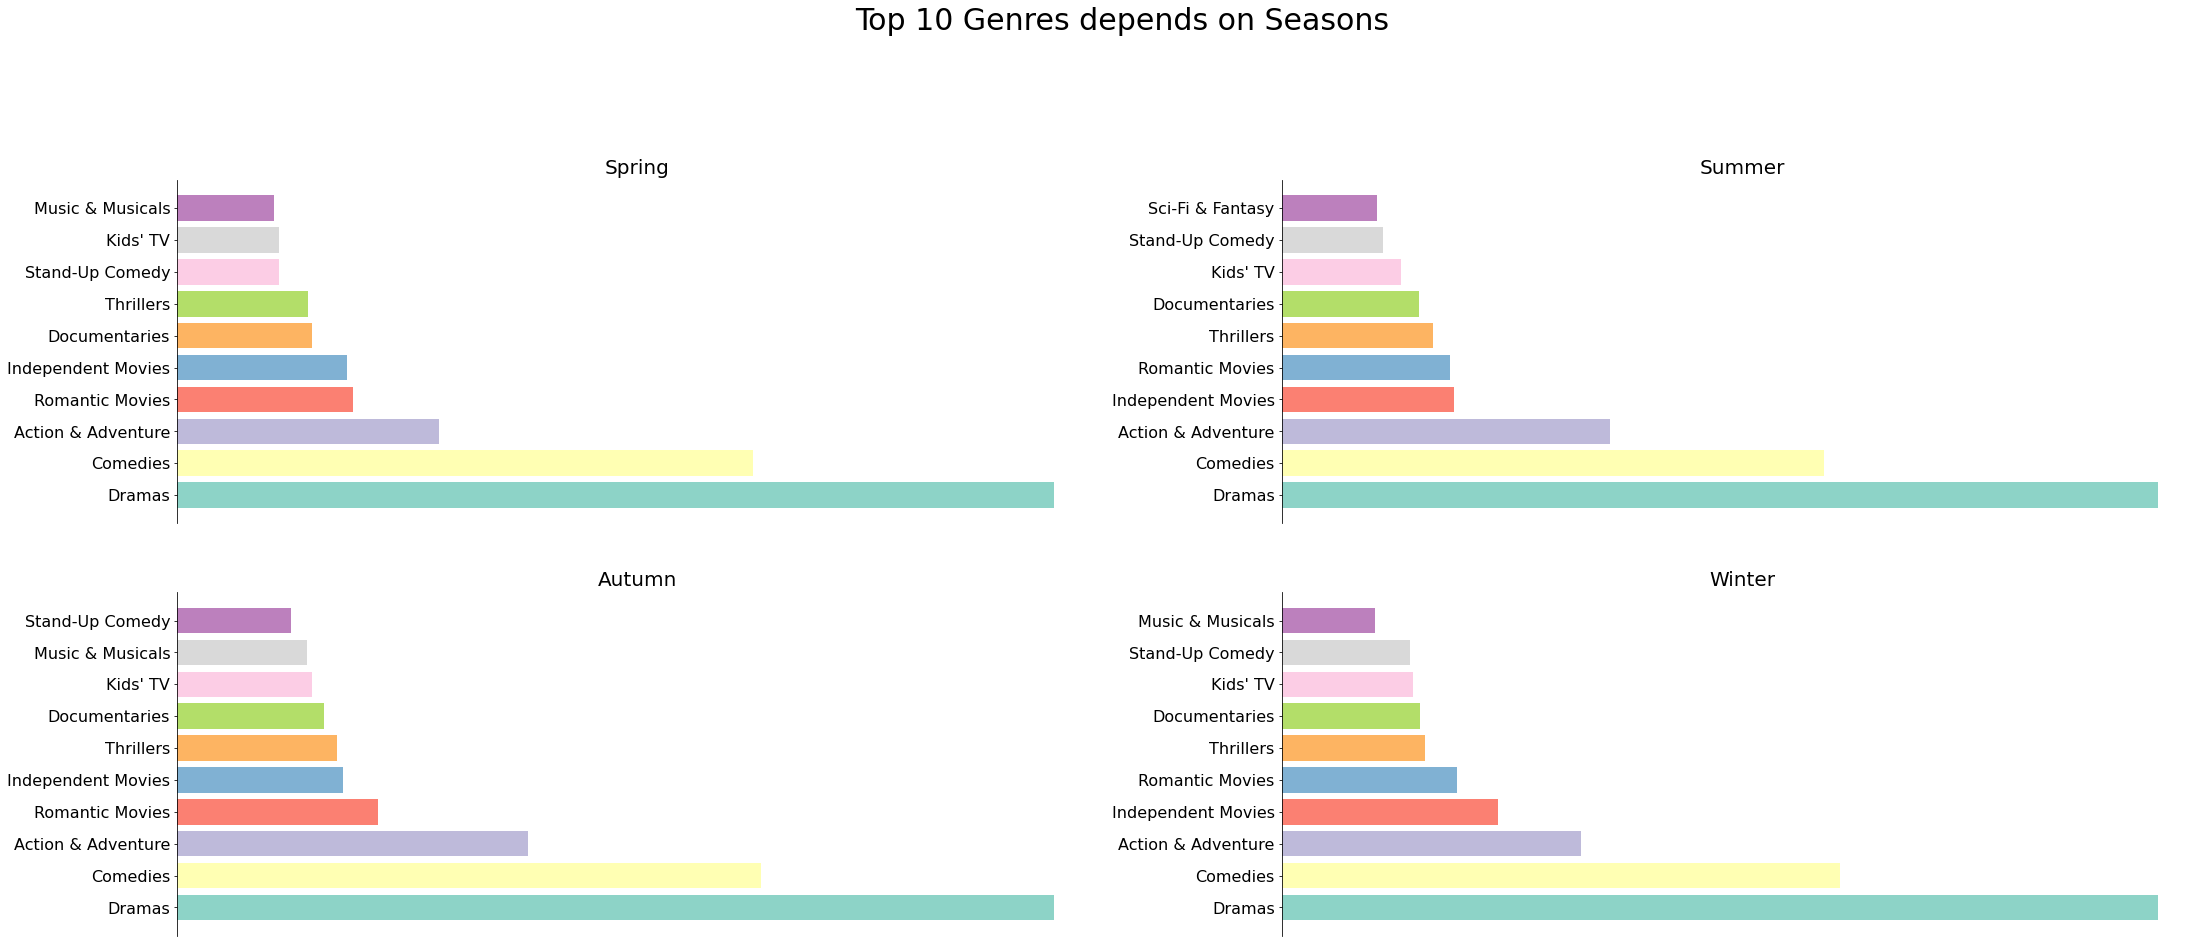

In [157]:
fig = plt.figure(figsize=(15,12))
plt.suptitle("Top 10 Genres depends on Seasons",fontsize=30,position=(1.0,1.2))
y = np.arange(10)
colors = sns.color_palette('Set3',10)
plt.subplot(2,2,1)
plt.title("Spring",fontsize=20)
top_genre = top_genre_spring.index[:10]
top_counts = top_genre_spring[:10]
plt.barh(y,top_counts,color=colors)
plt.yticks(y,top_genre,fontsize=16)
plt.spring()
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['bottom'].set_visible(False) #왼쪽 테두리 제거

plt.subplot(2,2,2)
plt.title("Summer",fontsize=20)
top_genre = top_genre_summer.index[:10]
top_counts = top_genre_summer[:10]
plt.barh(y,top_counts,color=colors)
plt.yticks(y,top_genre,fontsize=16)
plt.summer()
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['bottom'].set_visible(False) #왼쪽 테두리 제거

plt.subplot(2,2,3)
plt.title("Autumn",fontsize=20)
top_genre = top_genre_autumn.index[:10]
top_counts = top_genre_autumn[:10]
plt.barh(y,top_counts,color=colors)
plt.yticks(y,top_genre,fontsize=16)
plt.autumn()
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['bottom'].set_visible(False) #왼쪽 테두리 제거

plt.subplot(2,2,4)
plt.title("Winter",fontsize=20)
top_genre = top_genre_winter.index[:10]
top_counts = top_genre_winter[:10]
plt.barh(y,top_counts,color=colors)
plt.yticks(y,top_genre,fontsize=16)
plt.winter()
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
ax.spines['top'].set_visible(False) #위 테두리 제거
ax.spines['bottom'].set_visible(False) #왼쪽 테두리 제거

plt.subplots_adjust(right=2,top=1)

plt.show()

### *전체 데이터를 type 기준으로 영화와 tv 쇼 로 분리하여 비교*

In [29]:
groups = data.groupby(data.type)
tv_shows = groups.get_group('TV Show')
movies = groups.get_group('Movie')

In [30]:
print('tv shows')
tv_shows

tv shows


,show_id,type,title,director,country,release_year,rating,duration,listed_in,month,season
1,s2,TV Show,Blood & Water,No Data,South Africa,2021,TV-MA,2 Seasons,"[Dramas, Mysteries]",9,Autumn
2,s3,TV Show,Ganglands,Julien Leclercq,United States,2021,TV-MA,1 Season,[Crime Action & Adventure],9,Autumn
4,s5,TV Show,Kota Factory,No Data,India,2021,TV-MA,2 Seasons,[Romantic Comedies],9,Autumn
5,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021,TV-MA,1 Season,"[Dramas, Horror, Mysteries]",9,Autumn
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,2021,TV-14,9 Seasons,[British Reality TV],9,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8786,TV Show,YOM,No Data,United States,2016,TV-Y7,1 Season,[Kids' TV],6,Summer
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,No Data,"Japan, Canada",2015,TV-Y7,2 Seasons,"[Anime Series, Kids' TV]",5,Spring
8796,s8797,TV Show,Yunus Emre,No Data,Turkey,2016,TV-PG,2 Seasons,[Dramas],1,Winter
8797,s8798,TV Show,Zak Storm,No Data,"United States, France, South Korea, Indonesia",2016,TV-Y7,3 Seasons,[Kids' TV],9,Autumn


In [31]:
print('movies')
movies

movies


,show_id,type,title,director,country,release_year,rating,duration,listed_in,month,season
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",United States,2021,PG,91 min,[Children & Family Movies],9,Autumn
7,s8,Movie,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"[Dramas, Independent Movies]",9,Autumn
9,s10,Movie,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,"[Comedies, Dramas]",9,Autumn
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min,[Dramas],9,Autumn
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,United States,2021,TV-PG,91 min,[Children & Family Comedies],9,Autumn
...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan",2015,TV-MA,96 min,"[Dramas, Thrillers]",3,Spring
8802,s8803,Movie,Zodiac,David Fincher,United States,2007,R,158 min,"[Cult Dramas, Thrillers]",11,Autumn
8804,s8805,Movie,Zombieland,Ruben Fleischer,United States,2009,R,88 min,"[Comedies, Horror Movies]",11,Autumn
8805,s8806,Movie,Zoom,Peter Hewitt,United States,2006,PG,88 min,[Children & Family Comedies],1,Winter


####  *Movie 데이터의 계절별 장르 순위 분석*

In [32]:
# seasons = ['Spring','Summer','Autumn','Winter']
def genre_depending_season(showtype, season):
  season_extract = showtype[showtype['season']== season]
  genre_seasons = season_extract[['type','listed_in','season']]
  print(genre_seasons)

  
  season_data = pd.DataFrame()

  for genre in genre_seasons['listed_in'] :
    new_data = pd.DataFrame({'listed_in' : genre,'season': [season]*len(genre)})
    season_data = season_data.append(new_data)

  print(season_data)

  top_genre_season = season_data['listed_in'].value_counts()
  return top_genre_season

##### 1. 봄

In [33]:
movie_spring = genre_depending_season(movies ,'Spring')
movie_spring

       type                                         listed_in  season
826   Movie                                 [Stand-Up Comedy]  Spring
827   Movie                                        [Comedies]  Spring
828   Movie                                          [Dramas]  Spring
829   Movie                      [Children & Family Comedies]  Spring
834   Movie  [Children & Family Dramas, Faith & Spirituality]  Spring
...     ...                                               ...     ...
8769  Movie                      [Dramas, Independent Movies]  Spring
8770  Movie                         [Dramas, Romantic Movies]  Spring
8772  Movie                    [Action & Adventure, Comedies]  Spring
8801  Movie                               [Dramas, Thrillers]  Spring
8806  Movie                        [Dramas, Music & Musicals]  Spring

[1383 rows x 3 columns]
                     listed_in  season
0              Stand-Up Comedy  Spring
0                     Comedies  Spring
0                 

Dramas                                    596
Comedies                                  367
Action & Adventure                        184
Romantic Movies                           140
Independent Movies                        135
Documentaries                             107
Thrillers                                  92
Stand-Up Comedy                            81
Music & Musicals                           77
Children & Family Comedies                 64
Children & Family Movies                   49
Sports Movies                              41
Sci-Fi & Fantasy                           36
Horror Movies                              34
Horror Thrillers                           22
Children & Family Dramas                   17
Faith & Spirituality                       14
Movies                                     13
Independent Thrillers                      12
Independent Romantic Movies                11
Anime Features                             10
LGBTQ Movies                      

##### 2. 여름

In [34]:
movie_summer = genre_depending_season(movies ,'Summer')
movie_summer

       type                             listed_in  season
183   Movie  [Action & Adventure, Classic Movies]  Summer
188   Movie                            [Comedies]  Summer
190   Movie                              [Dramas]  Summer
191   Movie          [Dramas, Independent Movies]  Summer
192   Movie        [Action & Adventure, Comedies]  Summer
...     ...                                   ...     ...
8765  Movie                       [Horror Movies]  Summer
8768  Movie          [Dramas, Independent Movies]  Summer
8776  Movie          [Children & Family Comedies]  Summer
8784  Movie            [Children & Family Movies]  Summer
8788  Movie                              [Dramas]  Summer

[1453 rows x 3 columns]
                     listed_in  season
0           Action & Adventure  Summer
1               Classic Movies  Summer
0                     Comedies  Summer
0                       Dramas  Summer
0                       Dramas  Summer
..                         ...     ...
0     

Dramas                                    592
Comedies                                  356
Action & Adventure                        240
Independent Movies                        142
Romantic Movies                           138
Thrillers                                 113
Documentaries                             113
Stand-Up Comedy                            83
Music & Musicals                           62
Children & Family Comedies                 58
Children & Family Movies                   55
Sci-Fi & Fantasy                           53
Horror Movies                              37
Sports Movies                              36
Horror Thrillers                           23
Anime Features                             18
Classic Dramas                             18
Children & Family Dramas                   17
Independent Thrillers                      15
Horror Independent Movies                  14
Faith & Spirituality                       12
LGBTQ Movies                      

##### 3. 가을

In [35]:
movie_autumn = genre_depending_season(movies ,'Autumn')
movie_autumn

       type                     listed_in  season
6     Movie    [Children & Family Movies]  Autumn
7     Movie  [Dramas, Independent Movies]  Autumn
9     Movie            [Comedies, Dramas]  Autumn
12    Movie                      [Dramas]  Autumn
13    Movie  [Children & Family Comedies]  Autumn
...     ...                           ...     ...
8792  Movie          [Action & Adventure]  Autumn
8793  Movie  [Children & Family Comedies]  Autumn
8794  Movie  [Dramas, Independent Movies]  Autumn
8802  Movie      [Cult Dramas, Thrillers]  Autumn
8804  Movie     [Comedies, Horror Movies]  Autumn

[1448 rows x 3 columns]
                   listed_in  season
0   Children & Family Movies  Autumn
0                     Dramas  Autumn
1         Independent Movies  Autumn
0                   Comedies  Autumn
1                     Dramas  Autumn
..                       ...     ...
1         Independent Movies  Autumn
0                Cult Dramas  Autumn
1                  Thrillers  Autumn
0    

Dramas                                540
Comedies                              334
Action & Adventure                    238
Romantic Movies                       149
Independent Movies                    123
Documentaries                         109
Thrillers                             103
Music & Musicals                       96
Stand-Up Comedy                        84
Children & Family Comedies             73
Children & Family Movies               67
Horror Movies                          47
Sports Movies                          41
Sci-Fi & Fantasy                       36
Anime Features                         27
Horror Thrillers                       26
Classic Dramas                         20
Children & Family Dramas               17
LGBTQ Movies                           14
Faith & Spirituality                   11
Movies                                 10
Classic Comedies                        9
Independent Thrillers                   9
Children & Family Music & Musicals

##### 4. 겨울

In [36]:
movie_winter = genre_depending_season(movies ,'Winter')
movie_winter

       type                               listed_in  season
1258  Movie            [Children & Family Comedies]  Winter
1259  Movie  [Comedies, Dramas, Independent Movies]  Winter
1260  Movie             [Comedies, Romantic Movies]  Winter
1261  Movie            [Dramas, Independent Movies]  Winter
1262  Movie                      [Comedies, Dramas]  Winter
...     ...                                     ...     ...
8787  Movie             [Comedies, Romantic Movies]  Winter
8789  Movie                      [Comedies, Dramas]  Winter
8798  Movie                      [Comedies, Dramas]  Winter
8799  Movie                                [Dramas]  Winter
8805  Movie            [Children & Family Comedies]  Winter

[1367 rows x 3 columns]
                     listed_in  season
0   Children & Family Comedies  Winter
0                     Comedies  Winter
1                       Dramas  Winter
2           Independent Movies  Winter
0                     Comedies  Winter
..                   

Dramas                                 551
Comedies                               320
Action & Adventure                     191
Independent Movies                     158
Romantic Movies                        128
Documentaries                          101
Stand-Up Comedy                         94
Thrillers                               91
Music & Musicals                        68
Children & Family Comedies              67
Sci-Fi & Fantasy                        44
Children & Family Movies                43
Horror Movies                           33
Horror Thrillers                        31
Sports Movies                           30
Faith & Spirituality                    21
Children & Family Dramas                19
Movies                                  18
LGBTQ Movies                            16
Independent Thrillers                   13
Anime Features                          13
Classic Dramas                          11
Horror Sci-Fi & Fantasy                 11
Horror Inde

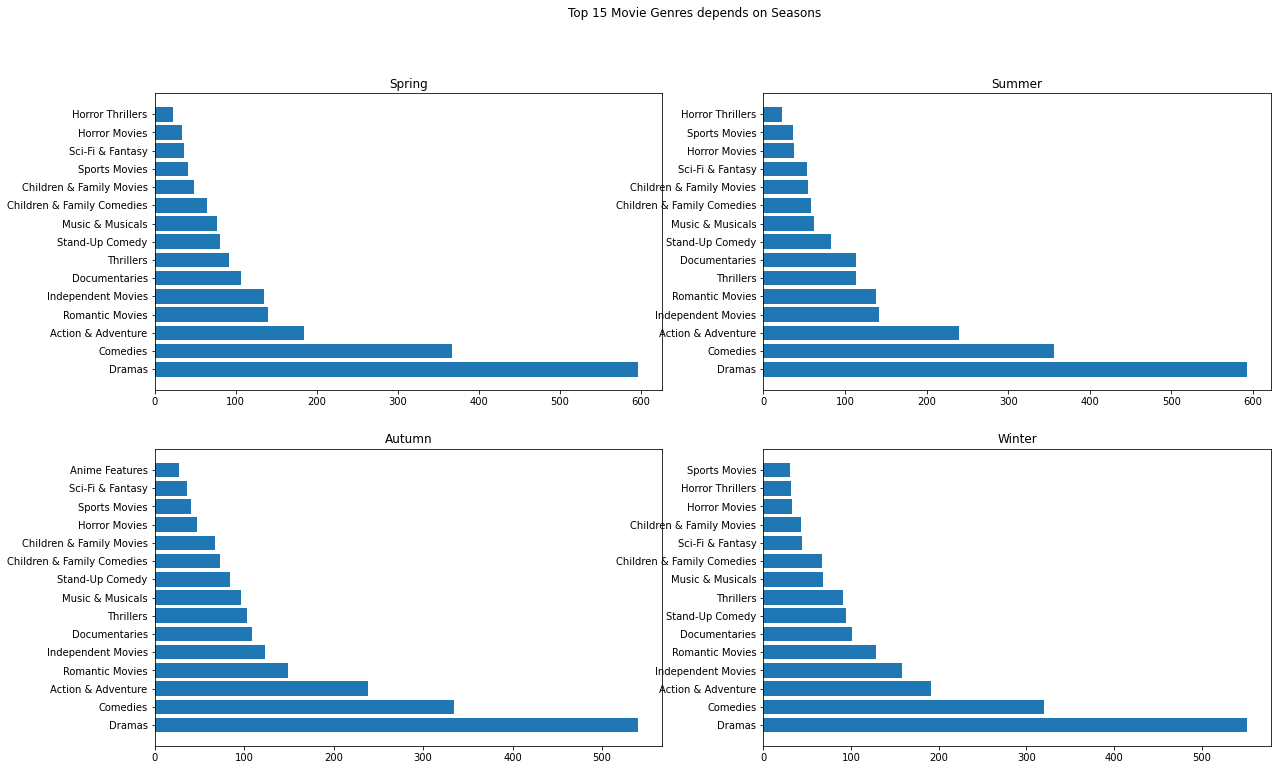

In [37]:
fig = plt.figure(figsize=(20,12))
plt.suptitle("Top 15 Movie Genres depends on Seasons")
y = np.arange(15)
plt.subplot(2,2,1)
plt.title("Spring")
top_genre = movie_spring.index[:15]
top_counts = movie_spring[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)

plt.subplot(2,2,2)
plt.title("Summer")
top_genre = movie_summer.index[:15]
top_counts = movie_summer[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)

plt.subplot(2,2,3)
plt.title("Autumn")
top_genre = movie_autumn.index[:15]
top_counts = movie_autumn[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)

plt.subplot(2,2,4)
plt.title("Winter")
top_genre = movie_winter.index[:15]
top_counts = movie_winter[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)

plt.show()

####  *TV Show 데이터의 계절별 장르 순위 분석*

##### 1. 봄

In [38]:
tv_show_spring = genre_depending_season(tv_shows,'Spring')
tv_show_spring

         type                                  listed_in  season
825   TV Show                  [Crime Dramas, Mysteries]  Spring
830   TV Show                         [Comedies, Dramas]  Spring
832   TV Show               [Action & Adventure, Dramas]  Spring
833   TV Show                             [Crime Dramas]  Spring
835   TV Show                             [Anime Series]  Spring
...       ...                                        ...     ...
8720  TV Show                         [Comedies, Dramas]  Spring
8740  TV Show  [British Docuseries, Science & Nature TV]  Spring
8741  TV Show  [British Docuseries, Science & Nature TV]  Spring
8780  TV Show                   [Anime Series, Kids' TV]  Spring
8795  TV Show                   [Anime Series, Kids' TV]  Spring

[541 rows x 3 columns]
              listed_in  season
0          Crime Dramas  Spring
1             Mysteries  Spring
0              Comedies  Spring
1                Dramas  Spring
0    Action & Adventure  Spring
..  

Dramas                                  101
Comedies                                 91
Kids' TV                                 81
Anime Series                             43
Crime Dramas                             38
Action & Adventure                       24
Docuseries                               23
Romantic Dramas                          22
Sci-Fi & Fantasy                         21
Science & Nature TV                      20
Romantic Comedies                        19
Horror                                   19
Reality TV                               18
Mysteries                                17
Korean Romantic Shows                    16
Stand-Up Comedy & Talk Shows             15
British Docuseries                       14
Crime Spanish-Language Shows             14
Thrillers                                12
Crime Korean Shows                        9
British Kids' TV                          9
British Comedies                          8
Crime Shows                     

##### 2. 여름

In [39]:
tv_show_summer = genre_depending_season(tv_shows,'Summer')
tv_show_summer

         type                 listed_in  season
184   TV Show              [Reality TV]  Summer
186   TV Show       [Romantic Comedies]  Summer
187   TV Show                [Comedies]  Summer
189   TV Show      [Kids' TV, Comedies]  Summer
193   TV Show                  [Dramas]  Summer
...       ...                       ...     ...
8684  TV Show  [Kids' TV, Korean Shows]  Summer
8749  TV Show       [Dramas, Thrillers]  Summer
8775  TV Show                [Comedies]  Summer
8783  TV Show                [Kids' TV]  Summer
8785  TV Show                [Kids' TV]  Summer

[626 rows x 3 columns]
            listed_in  season
0          Reality TV  Summer
0   Romantic Comedies  Summer
0            Comedies  Summer
0            Kids' TV  Summer
1            Comedies  Summer
..                ...     ...
0              Dramas  Summer
1           Thrillers  Summer
0            Comedies  Summer
0            Kids' TV  Summer
0            Kids' TV  Summer

[866 rows x 2 columns]


Dramas                                           129
Kids' TV                                          98
Comedies                                          90
Anime Series                                      49
Crime Dramas                                      44
Reality TV                                        40
Mysteries                                         36
Romantic Dramas                                   35
Action & Adventure                                30
Sci-Fi & Fantasy                                  25
Romantic Comedies                                 23
Crime Spanish-Language Shows                      20
Korean Romantic Shows                             18
Horror                                            17
Docuseries                                        16
Teen Shows                                        15
Crime Action & Adventure                          11
Thrillers                                         11
Romantic Spanish-Language Shows               

##### 3. 가을

In [40]:
tv_show_autumn = genre_depending_season(tv_shows,'Autumn')
tv_show_autumn

         type                              listed_in  season
1     TV Show                    [Dramas, Mysteries]  Autumn
2     TV Show             [Crime Action & Adventure]  Autumn
4     TV Show                    [Romantic Comedies]  Autumn
5     TV Show            [Dramas, Horror, Mysteries]  Autumn
8     TV Show                   [British Reality TV]  Autumn
...       ...                                    ...     ...
8592  TV Show                               [Dramas]  Autumn
8596  TV Show                             [Kids' TV]  Autumn
8599  TV Show  [British Classic & Cult TV, Comedies]  Autumn
8600  TV Show               [Kids' TV, Korean Shows]  Autumn
8797  TV Show                             [Kids' TV]  Autumn

[581 rows x 3 columns]
                    listed_in  season
0                      Dramas  Autumn
1                   Mysteries  Autumn
0    Crime Action & Adventure  Autumn
0           Romantic Comedies  Autumn
0                      Dramas  Autumn
..              

Dramas                                           109
Kids' TV                                         100
Comedies                                          98
Anime Series                                      42
Reality TV                                        40
Docuseries                                        36
Romantic Comedies                                 36
Crime Dramas                                      34
Mysteries                                         23
Action & Adventure                                22
Teen Shows                                        20
Sci-Fi & Fantasy                                  19
Romantic Dramas                                   18
Crime Spanish-Language Shows                      18
Science & Nature TV                               16
Horror                                            16
Thrillers                                         15
Crime Action & Adventure                          13
British Docuseries                            

##### 4. 겨울

In [41]:
tv_show_winter = genre_depending_season(tv_shows,'Winter')
tv_show_winter

         type                       listed_in  season
1257  TV Show                  [Anime Series]  Winter
1268  TV Show  [Crime Spanish-Language Shows]  Winter
1270  TV Show       [Spanish-Language Dramas]  Winter
1271  TV Show       [Spanish-Language Dramas]  Winter
1272  TV Show                    [Docuseries]  Winter
...       ...                             ...     ...
8736  TV Show             [Romantic Comedies]  Winter
8747  TV Show                    [Reality TV]  Winter
8758  TV Show            [British Docuseries]  Winter
8796  TV Show                        [Dramas]  Winter
8800  TV Show               [Romantic Dramas]  Winter

[566 rows x 3 columns]
                       listed_in  season
0                   Anime Series  Winter
0   Crime Spanish-Language Shows  Winter
0        Spanish-Language Dramas  Winter
0        Spanish-Language Dramas  Winter
0                     Docuseries  Winter
..                           ...     ...
0              Romantic Comedies  Winter


Kids' TV                                     96
Dramas                                       90
Comedies                                     88
Anime Series                                 37
Crime Dramas                                 36
Reality TV                                   35
Docuseries                                   31
Action & Adventure                           28
Romantic Dramas                              28
Romantic Comedies                            28
Korean Romantic Shows                        19
British Docuseries                           16
Mysteries                                    15
Sci-Fi & Fantasy                             15
Teen Shows                                   15
Horror                                       15
Thrillers                                    14
Science & Nature TV                          13
Stand-Up Comedy & Talk Shows                 11
Spanish-Language Dramas                      10
Crime Docuseries                        

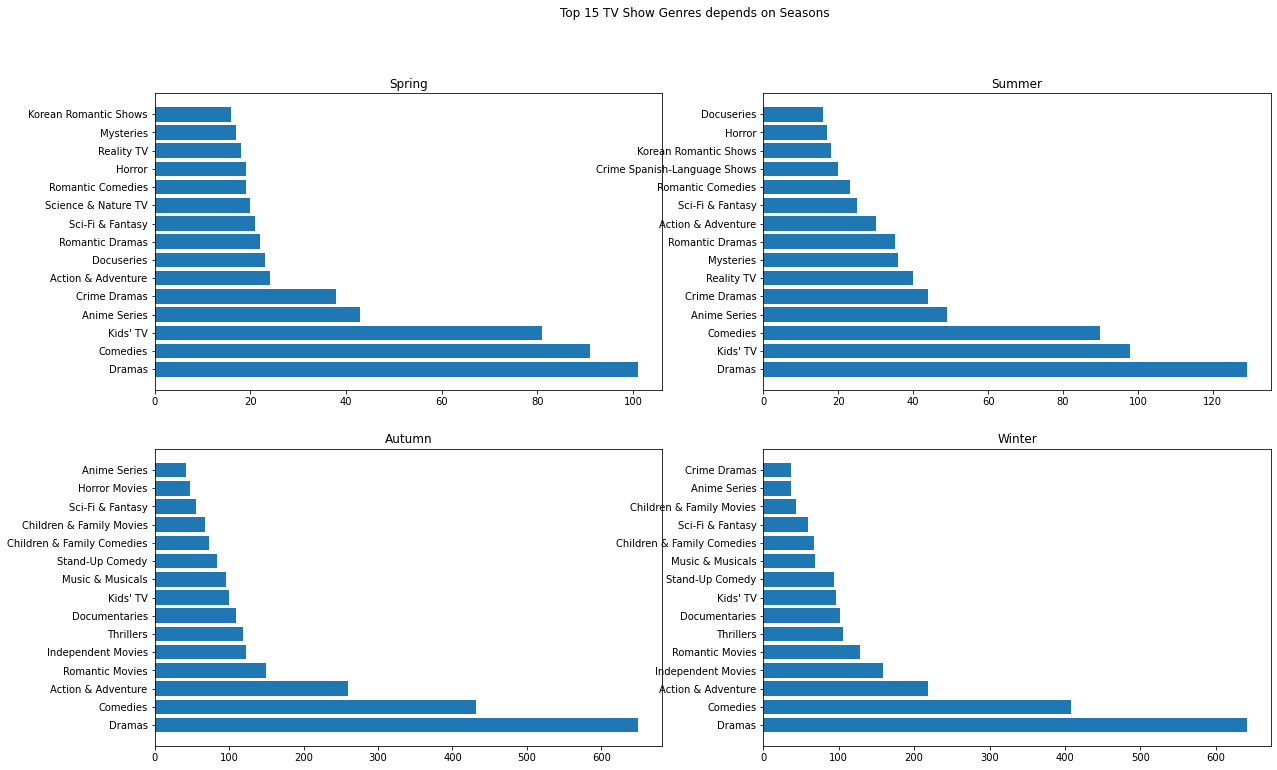

In [42]:
fig = plt.figure(figsize=(20,12))
plt.suptitle("Top 15 TV Show Genres depends on Seasons")
y = np.arange(15)
plt.subplot(2,2,1)
plt.title("Spring")
top_genre = tv_show_spring.index[:15]
top_counts = tv_show_spring[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)

plt.subplot(2,2,2)
plt.title("Summer")
top_genre = tv_show_summer.index[:15]
top_counts = tv_show_summer[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)

plt.subplot(2,2,3)
plt.title("Autumn")
top_genre = top_genre_autumn.index[:15]
top_counts = top_genre_autumn[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)

plt.subplot(2,2,4)
plt.title("Winter")
top_genre = top_genre_winter.index[:15]
top_counts = top_genre_winter[:15]
plt.barh(y,top_counts)
plt.yticks(y,top_genre)

plt.show()

### *movie 와 show 에 따른 계절별 장르 순위 비교 시각화*

In [141]:
def movie_tvshow_difference(moviedata,tvshowdata):
  y = np.arange(10)
  colors = sns.color_palette('Set3',10)
  # aa = fig.add_subplot()
  # plt.suptitle(titles[i-1],fontsize=30)

  
  plt.subplot(1,2,1)
  plt.title("Movies",fontsize=24)
  top_genre = moviedata.index[:10]
  top_counts = moviedata[:10]
  bar = plt.barh(y,top_counts,color=colors)
  plt.yticks(y,top_genre,fontsize=24)
  ax = plt.gca()
  ax.get_xaxis().set_visible(False)
  ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
  ax.spines['top'].set_visible(False) #위 테두리 제거
  ax.spines['bottom'].set_visible(False) #왼쪽 테두리 제거
  # ax.set_facecolor('dimgrey')
  # ax.yaxis.label.set_color('white')
  # ax.tick_params(axis='y',colors='white')

  # for i, b in enumerate(bar):
  #   plt.figure().add_subplot().text(b.get_x()+0.1,b.get_height()+b.get_width()*(1/2),
  #           top_counts[i],fontsize=16)



  plt.subplot(1,2,2)
  plt.title("TV Shows",fontsize=24)
  top_genre = tvshowdata.index[:10]
  top_counts = tvshowdata[:10]
  plt.barh(y,top_counts,color=colors)
  plt.yticks(y,top_genre,fontsize=24)
  ax = plt.gca()
  ax.get_xaxis().set_visible(False)
  ax.spines['right'].set_visible(False) #오른쪽 테두리 제거
  ax.spines['top'].set_visible(False) #위 테두리 제거
  ax.spines['bottom'].set_visible(False) #왼쪽 테두리 제거

  plt.subplots_adjust(right=2,top=1)

  plt.show()


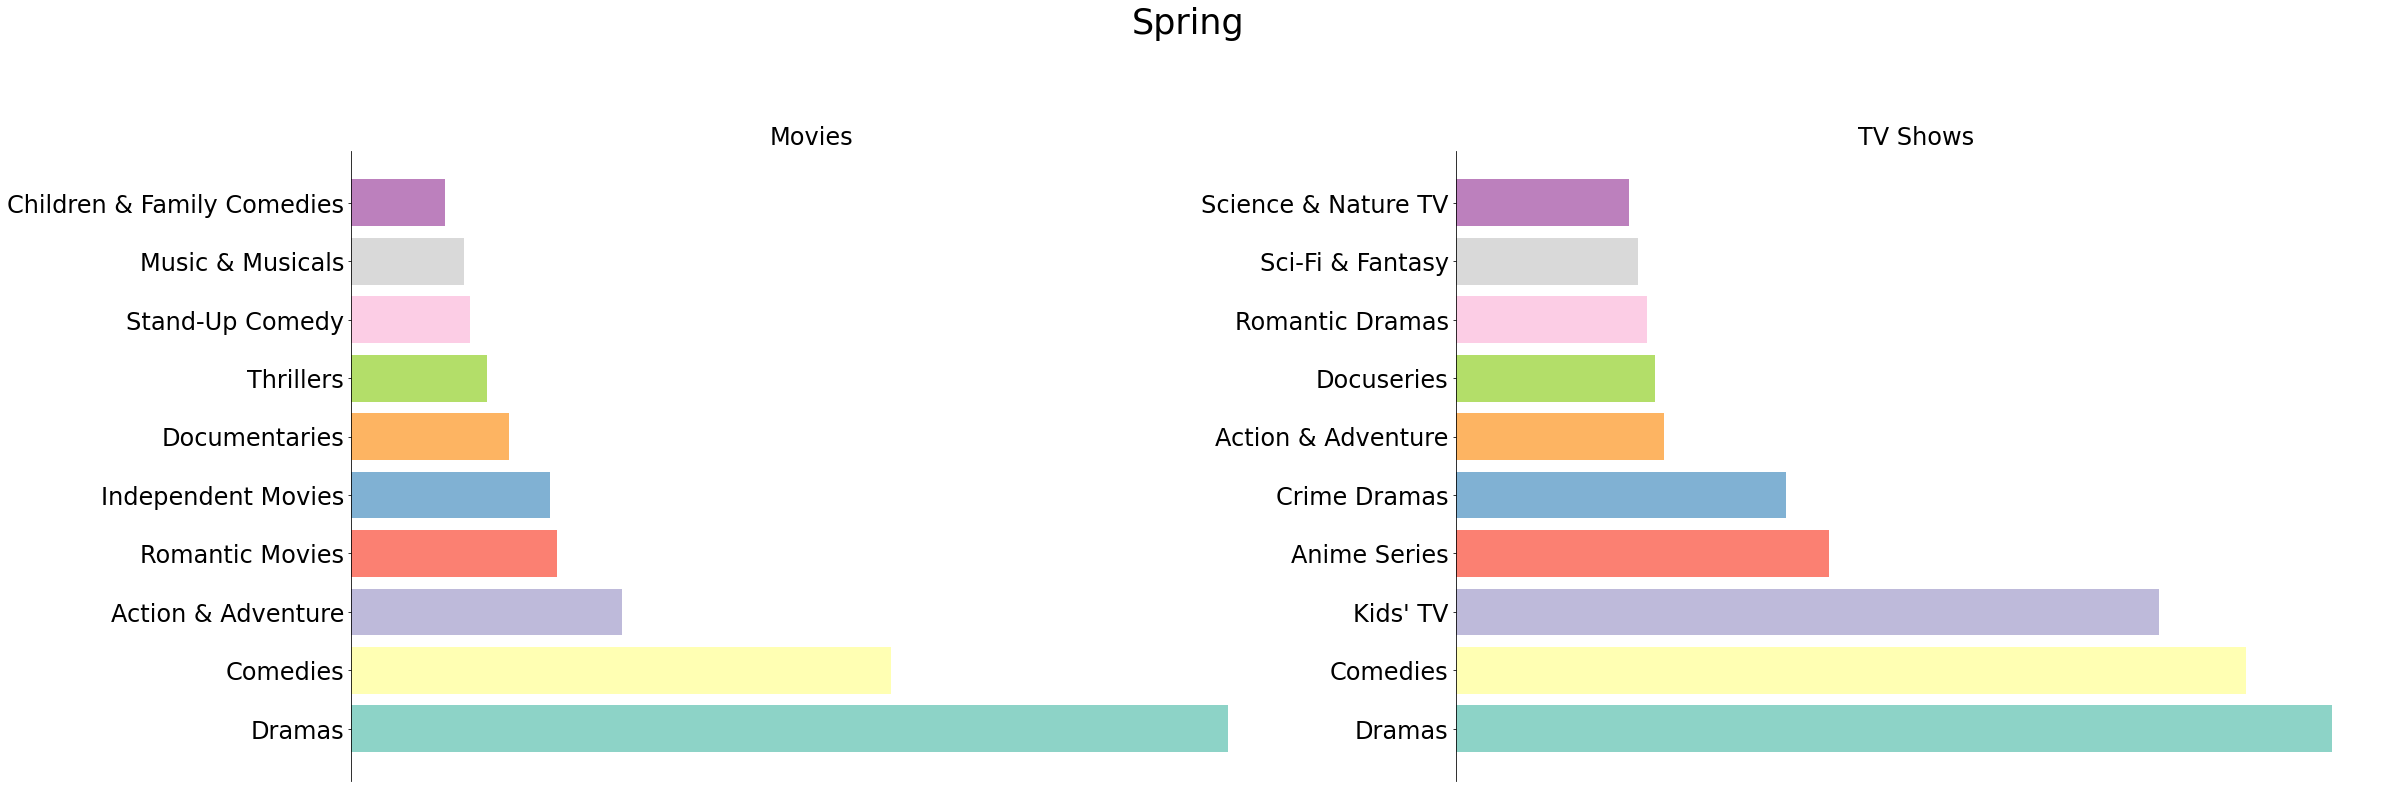

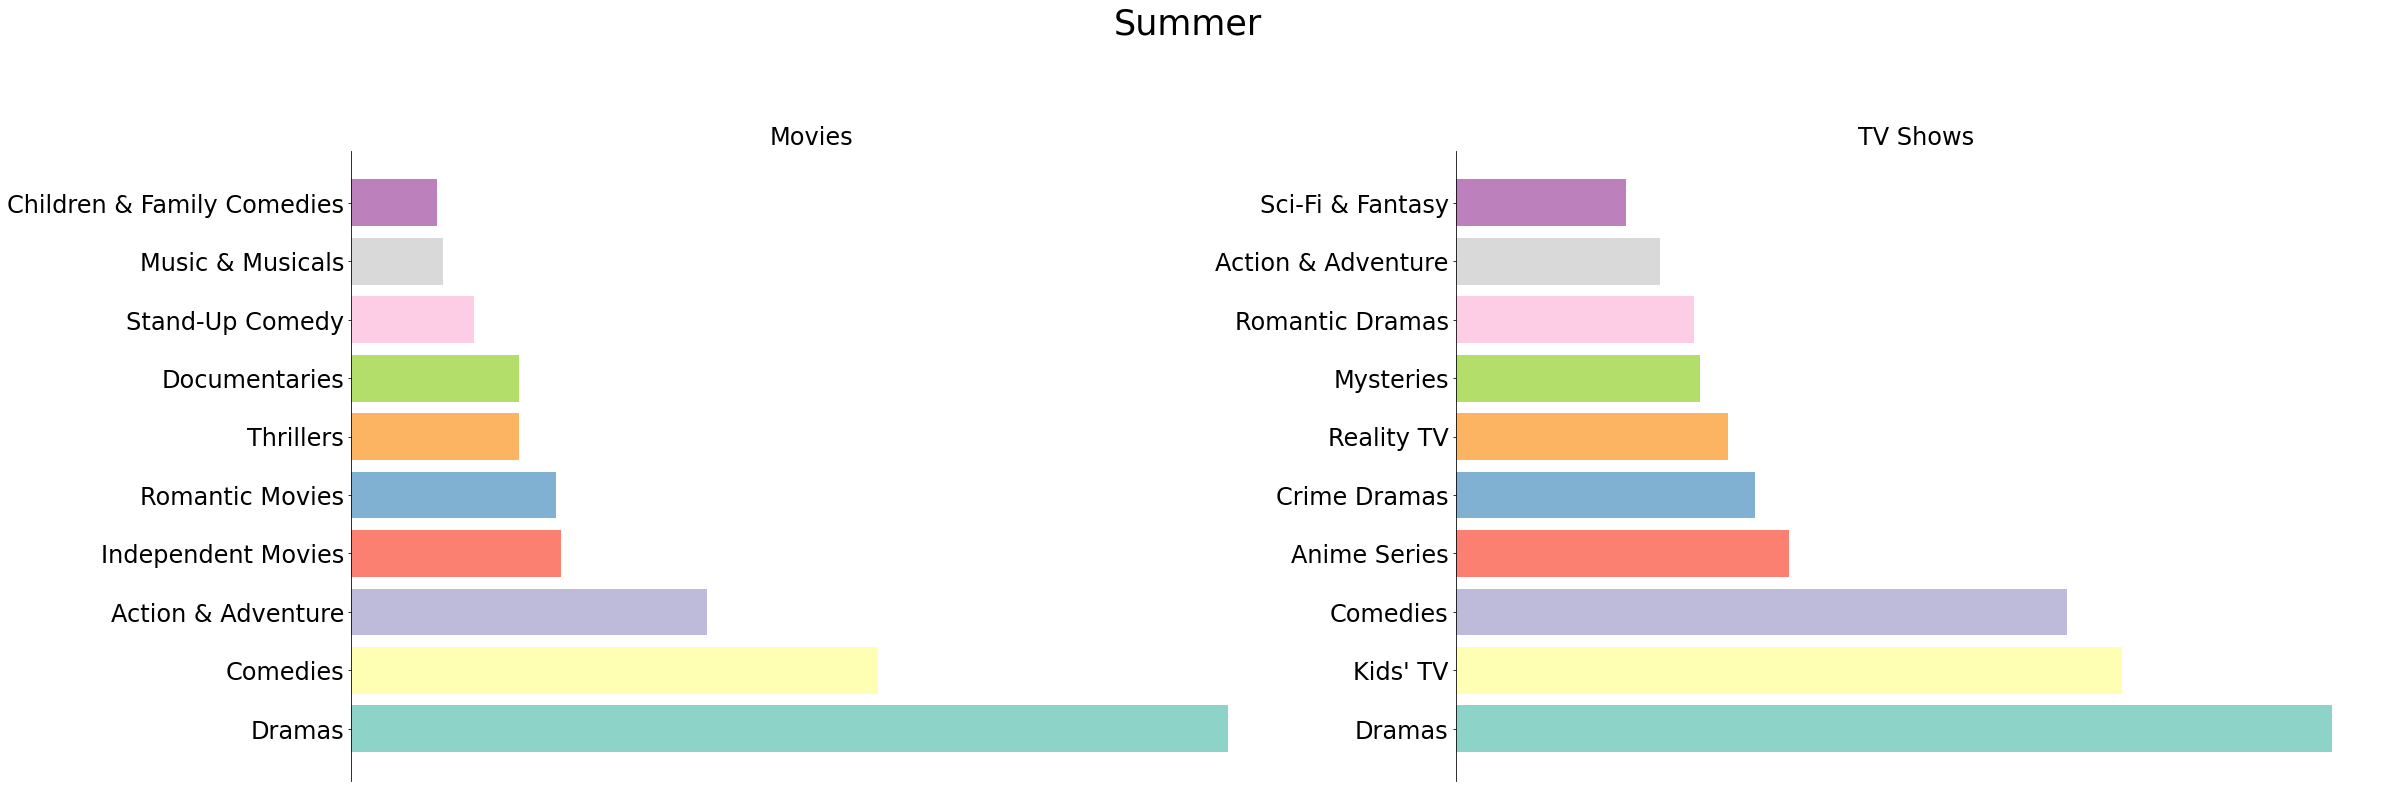

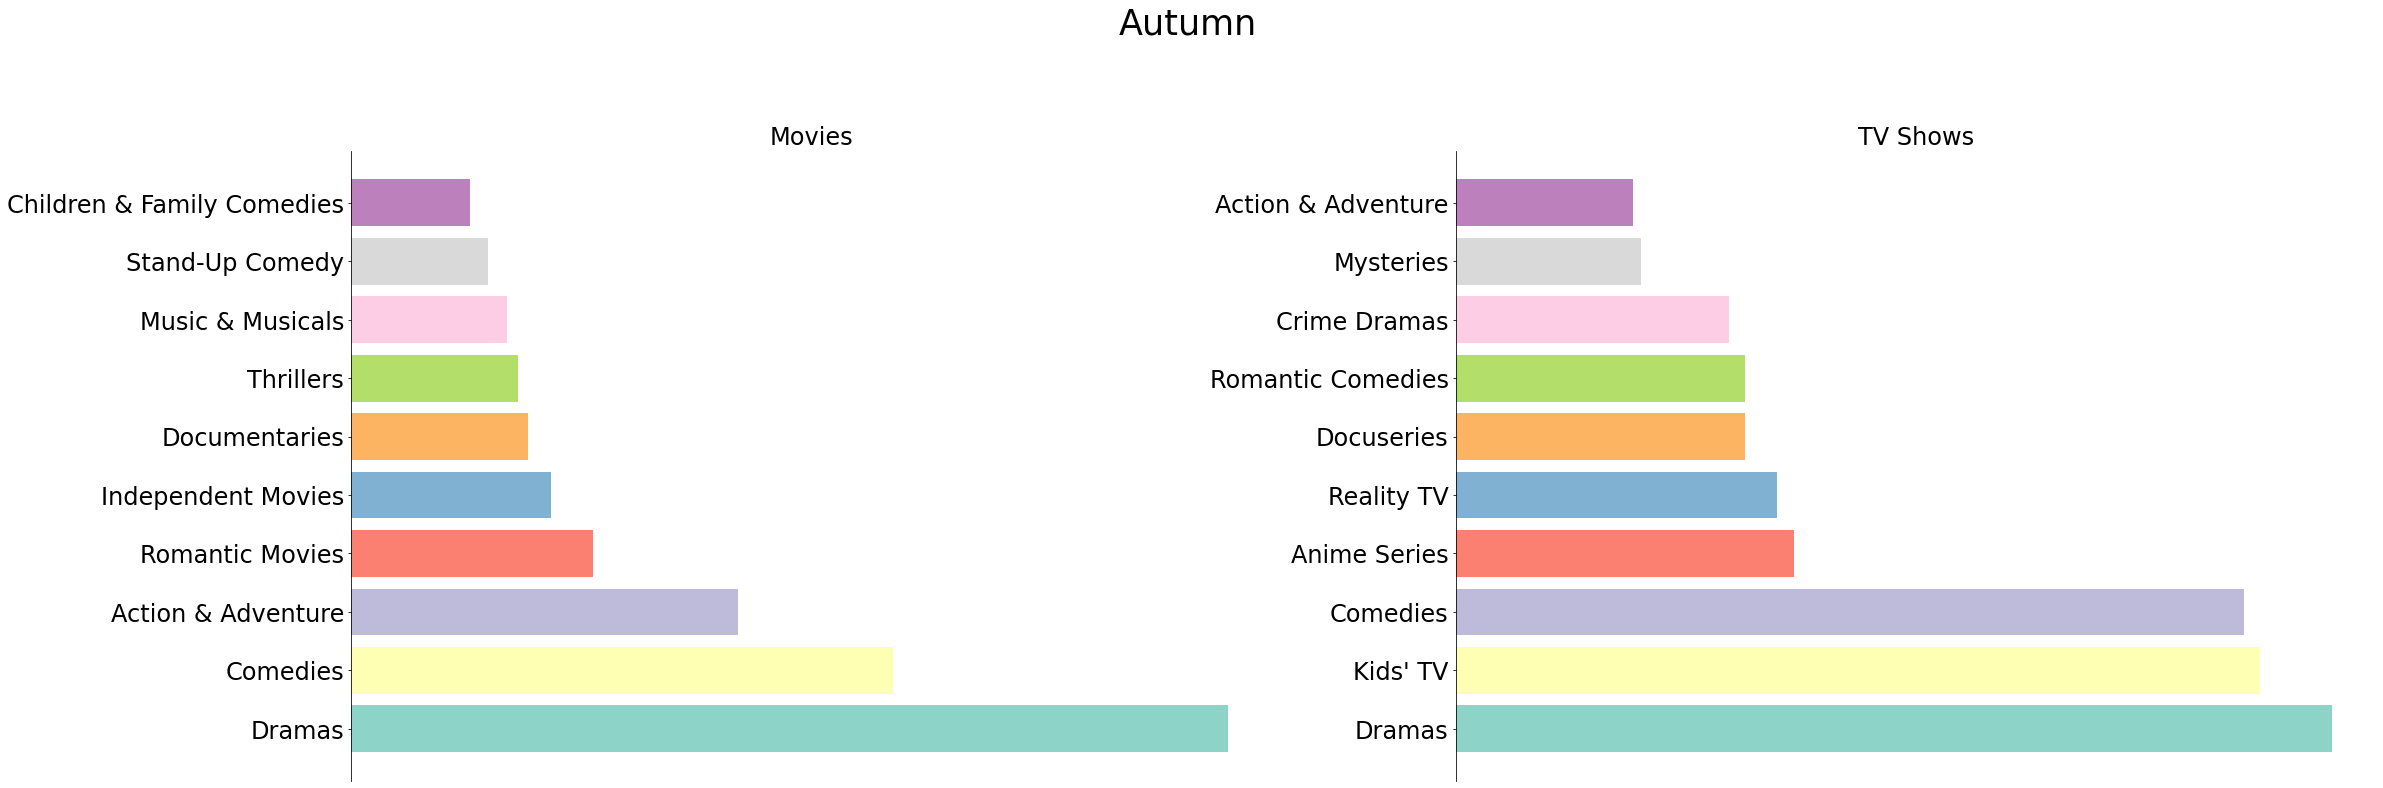

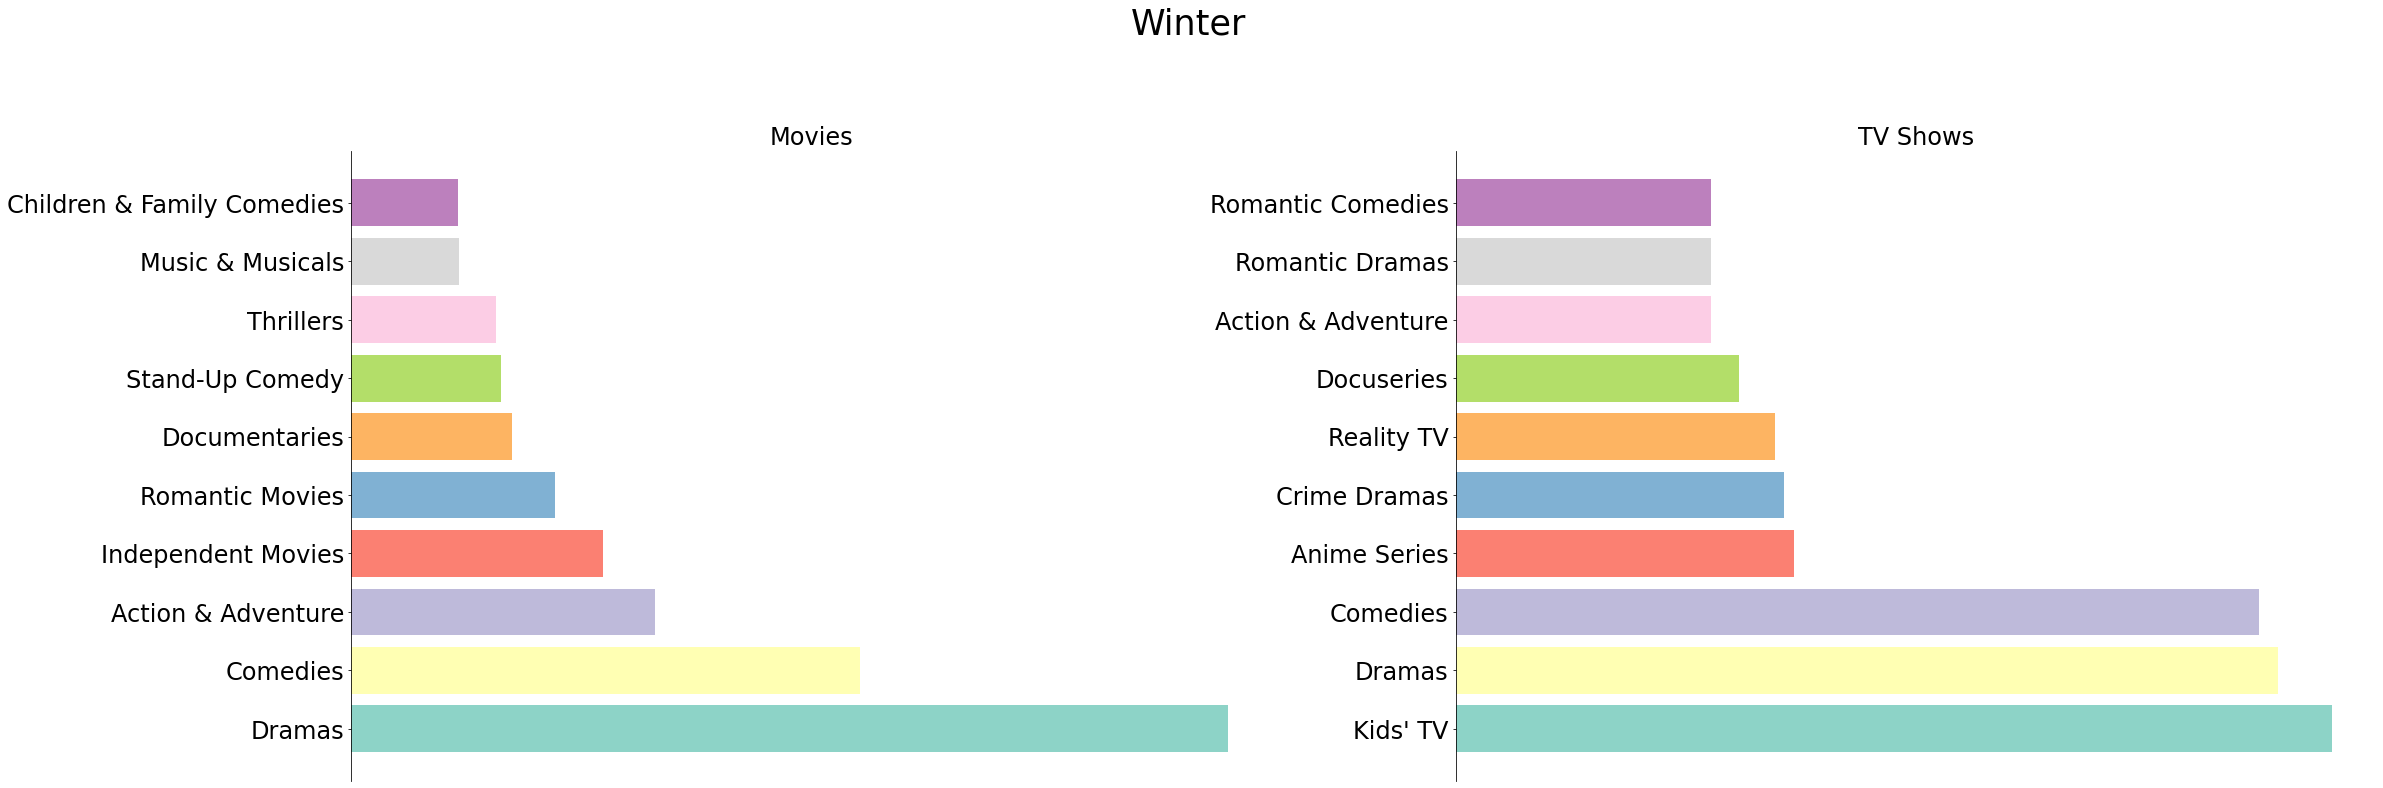

In [142]:
movie_or_tvshow =[[movie_spring,tv_show_spring],
                  [movie_summer,tv_show_summer],
                  [movie_autumn,tv_show_autumn],
                  [movie_winter,tv_show_winter]]

titles = ['Spring','Summer','Autumn','Winter']
for i in range(1,5):
  fig = plt.figure(figsize=(15,10))
  # fig.patch.set_facecolor('dimgrey')
  plt.subplot(4,1,i)
  plt.suptitle(titles[i-1],fontsize=35,position=(0.9,1.2))
  plt.subplots_adjust(top=15)
  movie_tvshow_difference(movie_or_tvshow[i-1][0],movie_or_tvshow[i-1][1])

In [44]:
most_movie_season = movies.groupby(data['season'])
most_movie_season['type'].value_counts()

season  type 
Autumn  Movie    1448
Spring  Movie    1383
Summer  Movie    1453
Winter  Movie    1367
Name: type, dtype: int64

In [45]:
most_tv_shows_season = tv_shows.groupby(data['season'])
most_tv_shows_season['type'].value_counts()

season  type   
Autumn  TV Show    581
Spring  TV Show    541
Summer  TV Show    626
Winter  TV Show    566
Name: type, dtype: int64

In [46]:
most_data_season = data.groupby(data['season'])
most_data_season['type'].value_counts()

season  type   
Autumn  Movie      1448
        TV Show     581
Spring  Movie      1383
        TV Show     541
Summer  Movie      1453
        TV Show     626
Winter  Movie      1367
        TV Show     566
Name: type, dtype: int64